# Gradient-based solver for ridge regression

In this notebook, you will create a **gradient descent** solver for **ridge regression** and then compare it to the built-in solver in `sklearn.linear_model`.

## 1. Set up notebook and create data set

After loading in some standard packages, we create a synthetic data set consisting of data points `(x,y)`:
* `x`: 100-dimensional vector whose coordinates are independent draws from a standard normal (Gaussian) distribution
* `y`: response value given by `y = wx + e` where `w` is a target regression function and `e` is Gaussian noise

We will fix `w` to be the 100-dimensional vector whose first ten coordinates are exactly 1.0, and whose remaining coordinates are zero. Thus only the first ten coordinates of `x` are relevant to the regression task.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

The following procedure, **generate_data**, creates a data set of a specified number of points. It is invoked as follows:
* `trainx, trainy = generate_data(n)`

Here:
* `n` is the target number of points
* `trainx`: `nx100` array of data points
* `trainy`: array of `n` response values

In [3]:
def generate_data(n):
    d = 100
    w = np.zeros(d)
    for i in range(0,10):
        w[i] = 1.0
    #
    trainx = np.random.normal(size=(n,d))
    e = np.random.normal(size=(n))
    trainy = np.dot(trainx, w) + e
    #
    return trainx, trainy

## 2. Gradient descent solver for ridge regression

<font color="magenta">**For you to do:**</font> Define a procedure, **ridge_regression_GD**, that uses gradient descent to solve the ridge regression problem. It is invoked as follows:

* `w,b,losses = ridge_regression_GD(x,y,C)`

Here, the input consists of:
* training data `x,y`, where `x` and `y` are numpy arrays of dimension `n`-by-`d` and `n`, respectively (if there are `n` training points)
* regularization constant `C`

The function should find the `d`-dimensional vector `w` and offset `b` that minimize the ridge regression loss function (with regularization constant `C`), and return:
* `w` and `b`
* `losses`, an array containing the ridge regression loss at each iteration

<font color="magenta">Advice:</font> First figure out the derivative, which has a relatively simple form. Next, when implementing gradient descent, think carefully about two issues.

1. What is the step size?
2. When has the procedure converged?

Take the time to experiment with different ways of handling these.

In [302]:
def ridge_regression_GD(x,y,C):
    ### Put your code here
    w_size = x.shape[1]
    w_old = np.zeros(w_size + 1)
    col_ones = np.ones((x.shape[0], 1))
    xp = np.append(col_ones, x, axis=1) # Add a column of ones to x
    tol = 1.e-4
    eta = 0.002
    
    # Initialize the weight vector
    for i in range(11):
        w_old[i] = 1.0  
    w_old_squared = np.dot(w_old[1:], w_old[1:])
    # Calculating the loss function
    losses_old = 0
    for i in range(y.shape[0]):
        losses_old += (y[i] - np.dot(w_old, xp[i]))**2 + C * w_old_squared
    
    print("Current loss amount is: ", losses_old)
    step = 0
    max_step = 100
    losses = []
    while True:
        step += 1  
        w_old_squared = np.dot(w_old[1:], w_old[1:])
        loss_gradient = np.zeros(w_old.shape[0])
        w_new = np.zeros(w_size + 1)
        for j in range(w_old.shape[0]):
            sum_linear = 0
            for i in range(y.shape[0]):
                sum_linear -= 2 * (y[i] - np.dot(w_old, xp[i][:])) * xp[i][j]
            w_new[j] = w_old[j] - eta * (sum_linear + 2 * C * w_old[j])
            if j == 1:
                loss_gradient[j] = sum_linear   
            else:
                loss_gradient[j] = sum_linear + 2 * C * w_old[j]
                
            loss_gradient_norm = np.linalg.norm(loss_gradient)
        print("The norm of loss gradient is ", loss_gradient_norm)
    #    if step >= 2:
    #        angle_grad = np.arccos(np.dot(loss_gradient, loss_gradient_old) / (np.linalg.norm(loss_gradient_old) * loss_gradient_norm))
    #        print("Angle between the gradients is: ", angle_grad)
        w_new_squared = np.dot(w_new[1:], w_new[1:])
        
        losses_new = 0
        for i in range(y.shape[0]):
            losses_new += (y[i] - np.dot(w_new, xp[i]))**2
        losses_new += C * w_new_squared
        print("Future loss amount is: ", losses_new)
        losses.append(losses_new)
        if step == max_step:
            w = w_new[1:]
            b = w_new[0]
            
            return w,b,losses
        elif losses_new > losses_old:
            print("new loss > old loss")
            eta *= 0.5
        #    print("w old is : ", w_old[:15])
        #    print("w new is: ", w_new[:15])
        elif losses_new < losses_old:
            print("new loss < old loss, we can increase eta")
        #    print("w old is : ", w_old[:15])
        #    print("w new is: ", w_new[:15])
        #    eta *= 2.0
        losses_old = losses_new.copy()
        w_old = w_new.copy()
        loss_gradient_old = loss_gradient.copy()
        print(10 * "*")


Let's try it out and print a graph of the loss values during the optimization process.

Current loss amount is:  2420.8924655557103
The norm of loss gradient is  547.7890103611779
Future loss amount is:  226.44458612312013
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  317.7185022925719
Future loss amount is:  189.52373290870972
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  257.32627906855066
Future loss amount is:  175.25328051702286
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  232.17626244262686
Future loss amount is:  169.7604353249667
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  226.55289091747215
Future loss amount is:  169.8545396820483
new loss > old loss
**********
The norm of loss gradient is  239.45176187758832
Future loss amount is:  142.48752955910513
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  33.88699673448452
Future loss amount is:  141.70184751573612
new loss < old loss, we ca

The norm of loss gradient is  2.5610097532005467
Future loss amount is:  139.30321212101785
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  2.5557764864658874
Future loss amount is:  139.3031184514171
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  2.5510222301465735
Future loss amount is:  139.30303500382956
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  2.5466987615300254
Future loss amount is:  139.3029605989457
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  2.542763110463202
Future loss amount is:  139.3028942012187
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  2.539176953503388
Future loss amount is:  139.30283490040856
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  2.535906080072801
Future loss amount is:  139.3027818956052
new loss < old loss, we can increase eta
**********

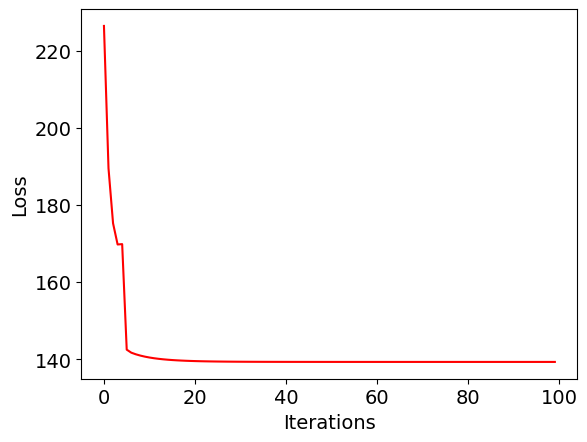

In [303]:
# Generate 200 data points
n = 200
#x,y = generate_data(n)
# Set regularization constant
C = 1.0
# Run gradient descent solver
w, b, losses = ridge_regression_GD(x,y,C)
# Plot the losses
plt.plot(losses,'r')
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.show()

<font color="magenta">**Something to think about**</font>

1. In setting the step size, does it work to use a fixed schedule 1/t? Why or why not?

2. Can you set up the gradient descent procedure in such a way that on each iteration, the loss monotonically decreases?


## 3. Evaluate the gradient descent solver

Now let's compare the regressor found by your gradient descent procedure to that returned by the built-in ridge regression solver in `sklearn`. We will compare them in two ways:
* Their MSE values
* The distance between the corresponding `w`-vectors

The latter should be smaller than 10^{-4}.


In [304]:
def compute_mse(w,b,x,y):
    residuals = y - (np.dot(x, w) + b)
    return np.dot(residuals, residuals)/n

In [305]:
# Generate 200 data points
n = 200
x,y = generate_data(n)
# Set regularization constant
C = 10.0
# Run gradient descent solver and compute its MSE
w, b, losses = ridge_regression_GD(x,y,C)
# Use built-in routine for ridge regression and compute MSE
regr = linear_model.Ridge(alpha=C)
regr.fit(x, y)
# Print MSE values and L2 distance between the regression functions
print("MSE of gradient descent solver: ", compute_mse(w,b,x,y))
print("MSE of built-in solver: ", mean_squared_error(regr.predict(x), y))
print("Distance between w-coefficients: ", np.linalg.norm(w-regr.coef_))

Current loss amount is:  20405.574172203003
The norm of loss gradient is  591.3056019589648
Future loss amount is:  310.84101177539407
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  397.34008836477665
Future loss amount is:  283.3206709668751
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  388.969564496511
Future loss amount is:  284.33828566552415
new loss > old loss
**********
The norm of loss gradient is  406.16897068890444
Future loss amount is:  203.80231180362523
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  56.216027216885
Future loss amount is:  201.70075531699985
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  38.06038514701872
Future loss amount is:  200.51727493132216
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  34.296513899233474
Future loss amount is:  199.62030066582105
new loss < old loss, we can i

The norm of loss gradient is  17.45571272063853
Future loss amount is:  196.14771657937058
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  17.455870365942364
Future loss amount is:  196.14756570445286
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  17.456026306340714
Future loss amount is:  196.14742984121492
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  17.45617891977308
Future loss amount is:  196.1473073369051
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  17.456326986002352
Future loss amount is:  196.14719673805644
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  17.45646961279941
Future loss amount is:  196.14709676464912
new loss < old loss, we can increase eta
**********
The norm of loss gradient is  17.45660617445997
Future loss amount is:  196.1470062878093
new loss < old loss, we can increase eta
*********

In [306]:
w

array([ 8.72922606e-01,  9.12387867e-01,  1.02857447e+00,  8.84377070e-01,
        1.07595411e+00,  9.90560760e-01,  9.36886884e-01,  1.02024295e+00,
        7.76572998e-01,  8.37638885e-01, -6.50122262e-02, -3.02433078e-02,
       -6.75298913e-02, -3.13456272e-02,  2.50167334e-02,  5.79490007e-02,
        3.19210897e-02,  7.84786716e-02, -1.64843454e-01, -1.00800972e-02,
        2.98751389e-02,  1.51344137e-01, -3.10724276e-03,  1.93785915e-02,
       -6.37642854e-02, -3.03598855e-02, -1.17764011e-01,  1.03975224e-01,
       -8.56209901e-02,  1.51013160e-02, -2.48931764e-02,  1.48742885e-01,
        1.39556106e-01,  3.35901665e-02,  1.98192881e-01,  7.70166933e-03,
        3.82373566e-02,  8.72424578e-02, -3.18792681e-02,  3.46162181e-02,
        1.76820745e-01, -4.42804440e-02,  1.04527445e-01,  7.40644495e-02,
        6.48423563e-02,  1.13033422e-01, -7.44050892e-02, -8.39123461e-02,
        4.94976731e-02,  5.67822987e-02, -7.47946042e-02, -1.43154689e-02,
        6.55059025e-02, -

<font color="magenta">**Something to think about**</font>

The data was originally generated using a linear function in which only ten of the 100 features (the first ten) were relevant. Does the vector `w` returned by ridge regression correctly identify the relevant features?